In [2]:
import os
import sys
import time
import json
import shutil
import warnings
warnings.filterwarnings('ignore')
import argparse
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, matthews_corrcoef
from imblearn.metrics import geometric_mean_score
from metrics import *
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from datasets import *
from utils import *
from models import *

# Finals

In [44]:
def show_results(model_name):
    results = []
    for i in range(3):
        res = pickle.load(open("/home/user/wanzhang/Trans4Ab/Transformer4Ab-locla/results/CoV-AbDab/{}/result_{}.pkl".format(model_name, i), "rb"))
        results.append(res)
    #     print(res)

    acc = []
    f1 = []
    auc = []
    gmean = []
    mcc = []
    for i in range(3):
        acc.extend(results[i][1])
        f1.extend(results[i][2])
        auc.extend(results[i][3])
        gmean.extend(results[i][4])
        mcc.extend(results[i][5])

    print(model_name.split("_")[0], "\n")
    print("acc:\t{:.4f} ± {:.4f}".format(np.mean(acc), np.std(acc)))
    print("f1:\t{:.4f} ± {:.4f}".format(np.mean(f1), np.std(f1)))
    print("auc:\t{:.4f} ± {:.4f}".format(np.mean(auc), np.std(auc)))
    print("gmean:\t{:.4f} ± {:.4f}".format(np.mean(gmean), np.std(gmean)))
    print("mcc:\t{:.4f} ± {:.4f}".format(np.mean(mcc), np.std(mcc)))

In [46]:
show_results(model_name = "lstm_07-14-22-21-42")

lstm 

acc:	0.7301 ± 0.1128
f1:	0.8382 ± 0.0761
auc:	0.5054 ± 0.1265
gmean:	0.0294 ± 0.0890
mcc:	-0.0015 ± 0.0599


In [47]:
show_results(model_name = "textcnn_07-14-22-41-23")

textcnn 

acc:	0.7269 ± 0.0988
f1:	0.8379 ± 0.0668
auc:	0.5889 ± 0.1087
gmean:	0.0136 ± 0.0733
mcc:	0.0011 ± 0.0742


In [48]:
show_results(model_name = "masonscnn_07-14-22-49-34")

masonscnn 

acc:	0.7323 ± 0.1080
f1:	0.8410 ± 0.0714
auc:	0.5693 ± 0.0936
gmean:	0.0000 ± 0.0000
mcc:	-0.0046 ± 0.0180


In [49]:
show_results(model_name = "ag_fast_parapred_07-14-22-56-42")

ag 

acc:	0.7204 ± 0.1122
f1:	0.8190 ± 0.0876
auc:	0.6259 ± 0.1606
gmean:	0.2824 ± 0.2633
mcc:	0.0815 ± 0.2234


In [50]:
show_results(model_name = "pipr_07-15-00-19-18")

pipr 

acc:	0.7355 ± 0.1125
f1:	0.8414 ± 0.0766
auc:	0.6962 ± 0.1430
gmean:	0.0140 ± 0.0754
mcc:	0.0016 ± 0.0086


In [51]:
show_results(model_name = "resppi_07-15-00-28-39")

resppi 

acc:	0.7258 ± 0.1290
f1:	0.8174 ± 0.1329
auc:	0.6082 ± 0.1670
gmean:	0.1562 ± 0.2646
mcc:	0.0621 ± 0.2277


In [52]:
show_results(model_name = "pesi_07-15-13-54-18")

pesi 

acc:	0.7172 ± 0.0823
f1:	0.8246 ± 0.0614
auc:	0.6276 ± 0.1407
gmean:	0.2347 ± 0.2746
mcc:	0.1166 ± 0.1605


In [53]:
show_results(model_name = "pesi_07-16-00-00-02")

pesi 

acc:	0.7301 ± 0.1165
f1:	0.8356 ± 0.0800
auc:	0.5768 ± 0.1816
gmean:	0.1735 ± 0.2901
mcc:	0.0855 ± 0.2258


In [54]:
show_results(model_name = "pesi_07-16-00-50-52")

pesi 

acc:	0.7290 ± 0.0918
f1:	0.8317 ± 0.0639
auc:	0.6328 ± 0.1611
gmean:	0.2168 ± 0.2592
mcc:	0.0957 ± 0.1844


In [55]:
show_results(model_name = "pesi_07-16-21-48-12")

pesi 

acc:	0.7204 ± 0.1055
f1:	0.8272 ± 0.0752
auc:	0.6213 ± 0.1248
gmean:	0.1561 ± 0.2390
mcc:	0.0753 ± 0.1726


In [61]:
model_name = "pesi_07-16-21-48-12"
i = 2
res = pickle.load(open("/home/user/wanzhang/Trans4Ab/Transformer4Ab-locla/results/CoV-AbDab/{}/result_{}.pkl".format(model_name, i), "rb"))
res

('pesi_ft',
 [array(0.64516129),
  array(0.64516129),
  array(0.87096774),
  array(0.5483871),
  array(0.90322581),
  array(0.74193548),
  array(0.77419355),
  array(0.70967742),
  array(0.64516129),
  array(0.67741935)],
 [array(0.7755102),
  array(0.78431373),
  array(0.92592593),
  array(0.70833333),
  array(0.94915254),
  array(0.85185185),
  array(0.8627451),
  array(0.82352941),
  array(0.78431373),
  array(0.76190476)],
 [array(0.58095238),
  array(0.62272727),
  array(0.72666667),
  array(0.66386555),
  array(0.86666667),
  array(0.65217391),
  array(0.76153846),
  array(0.57575758),
  array(0.52727273),
  array(0.78571429)],
 [array(0.3007926),
  array(0.),
  array(0.57735027),
  array(0.),
  array(0.),
  array(0.),
  array(0.58177447),
  array(0.32566947),
  array(0.),
  array(0.69006556)],
 [array(0.00752923),
  array(0.),
  array(0.53605627),
  array(0.),
  array(-0.04794633),
  array(0.),
  array(0.22915676),
  array(0.12131004),
  array(0.),
  array(0.32278802)])

In [70]:
show_results(model_name = "pesi_07-16-22-43-44")

pesi 

acc:	0.7419 ± 0.0931
f1:	0.8404 ± 0.0690
auc:	0.6314 ± 0.1536
gmean:	0.2154 ± 0.2826
mcc:	0.1244 ± 0.2049


new ones done in 07.17

In [71]:
show_results("pesi_07-17-16-24-52")

pesi 

acc:	0.7183 ± 0.0908
f1:	0.8282 ± 0.0635
auc:	0.6059 ± 0.1308
gmean:	0.1340 ± 0.2313
mcc:	0.0656 ± 0.1415


In [72]:
model_name = "pesi_07-17-16-24-52"

results = []
for i in range(3):
    res = pickle.load(open("/home/user/wanzhang/Trans4Ab/Transformer4Ab-locla/results/CoV-AbDab/{}/result_{}.pkl".format(model_name, i), "rb"))
    results.append(res)
#     print(res)

acc = []
f1 = []
auc = []
gmean = []
mcc = []
for i in range(3):
    acc.extend(results[i][1])
    f1.extend(results[i][2])
    auc.extend(results[i][3])
    gmean.extend(results[i][4])
    mcc.extend(results[i][5])

print(model_name.split("_")[0], "\n")
print("acc:\t{:.4f} ± {:.4f}".format(np.mean(acc), np.std(acc)))
print("f1:\t{:.4f} ± {:.4f}".format(np.mean(f1), np.std(f1)))
print("auc:\t{:.4f} ± {:.4f}".format(np.mean(auc), np.std(auc)))
print("gmean:\t{:.4f} ± {:.4f}".format(np.mean(gmean), np.std(gmean)))
print("mcc:\t{:.4f} ± {:.4f}".format(np.mean(mcc), np.std(mcc)))

pesi 

acc:	0.7183 ± 0.0908
f1:	0.8282 ± 0.0635
auc:	0.6059 ± 0.1308
gmean:	0.1340 ± 0.2313
mcc:	0.0656 ± 0.1415


In [73]:
acc

[array(0.67741935),
 array(0.64516129),
 array(0.80645161),
 array(0.5483871),
 array(0.80645161),
 array(0.80645161),
 array(0.67741935),
 array(0.70967742),
 array(0.64516129),
 array(0.61290323),
 array(0.67741935),
 array(0.64516129),
 array(0.80645161),
 array(0.5483871),
 array(0.96774194),
 array(0.74193548),
 array(0.83870968),
 array(0.74193548),
 array(0.64516129),
 array(0.74193548),
 array(0.67741935),
 array(0.64516129),
 array(0.80645161),
 array(0.64516129),
 array(0.77419355),
 array(0.77419355),
 array(0.77419355),
 array(0.70967742),
 array(0.64516129),
 array(0.80645161)]

# cov-abdab sequence setting results

In [80]:
show_results("lstm_07-20-13-45-20")

lstm 

acc:	0.7462 ± 0.0863
f1:	0.8516 ± 0.0604
auc:	0.4712 ± 0.1309
gmean:	0.0000 ± 0.0000
mcc:	0.0000 ± 0.0000


In [74]:
show_results("textcnn_07-19-20-44-18")

textcnn 

acc:	0.7462 ± 0.0863
f1:	0.8516 ± 0.0604
auc:	0.6958 ± 0.1664
gmean:	0.0000 ± 0.0000
mcc:	0.0000 ± 0.0000


In [75]:
show_results("masonscnn_07-19-20-51-58")

masonscnn 

acc:	0.7462 ± 0.0863
f1:	0.8516 ± 0.0604
auc:	0.6535 ± 0.1571
gmean:	0.0000 ± 0.0000
mcc:	0.0000 ± 0.0000


In [76]:
show_results("ag_fast_parapred_07-19-20-58-47")

ag 

acc:	0.6808 ± 0.1377
f1:	0.7643 ± 0.1867
auc:	0.6345 ± 0.1292
gmean:	0.2614 ± 0.2700
mcc:	0.0599 ± 0.1580


In [77]:
show_results("pipr_07-19-22-08-41")

pipr 

acc:	0.7474 ± 0.0835
f1:	0.8500 ± 0.0647
auc:	0.7776 ± 0.1089
gmean:	0.0263 ± 0.1030
mcc:	0.0052 ± 0.0242


In [78]:
show_results("resppi_07-19-22-17-31")

resppi 

acc:	0.7564 ± 0.0868
f1:	0.8567 ± 0.0603
auc:	0.6723 ± 0.1479
gmean:	0.0925 ± 0.1895
mcc:	0.0763 ± 0.1585


In [79]:
show_results("pesi_07-19-22-32-10")

pesi 

acc:	0.7449 ± 0.0902
f1:	0.8473 ± 0.0655
auc:	0.5932 ± 0.1362
gmean:	0.1124 ± 0.2325
mcc:	0.0653 ± 0.1542


# oas pre-training

In [6]:
train_loss = np.load("/home/user/wanzhang/Transformer4Ab-locla/results/OAS/0619031446/loss_buf.npy")
val_loss = np.load("/home/user/wanzhang/Transformer4Ab-locla/results/OAS/0619031446/val_loss_buf.npy")

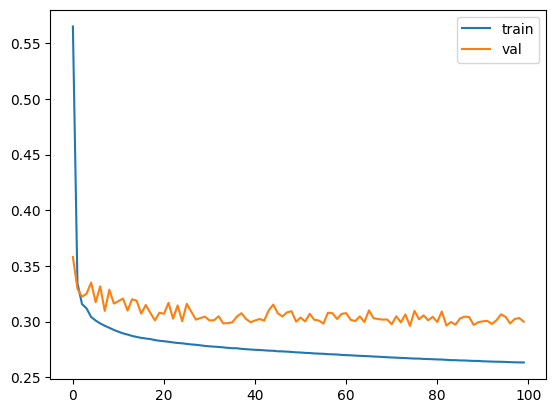

In [7]:
plt.plot(train_loss)
plt.plot(val_loss)

plt.legend(["train", "val"])
plt.show()

# pre-training

In [2]:
!pwd

/home/user/wanzhang/Transformer4Ab-locla


In [10]:
os.listdir("./results/SAbDab/full/seq1_neg0/pesi/")

['model_bestauc.pth',
 'val_loss_buf.npy',
 'val_acc_bestmcc.npy',
 'model_bestgmean.pth',
 'val_gmean_best.npy',
 'val_acc_bestf1.npy',
 'val_auc_best.npy',
 'val_acc_bestgmean.npy',
 'val_f1_bestf1.npy',
 'val_acc_buf.npy',
 'model_bestf1.pth',
 'val_gmean_bestauc.npy',
 'val_auc_bestgmean.npy',
 'val_acc_bestauc.npy',
 'val_acc_best.npy',
 'val_gmean_bestf1.npy',
 'val_gmean_buf.npy',
 'model.pth',
 'val_mcc_bestauc.npy',
 'val_gmean_bestmcc.npy',
 'val_auc_bestmcc.npy',
 'loss_buf.npy',
 'val_auc_bestf1.npy',
 'val_mcc_buf.npy',
 'model_best.pth',
 'val_gmean_bestgmean.npy',
 'val_f1_buf.npy',
 'val_f1_bestauc.npy',
 'model_bestmcc.pth',
 'val_f1_best.npy',
 'val_mcc_bestf1.npy',
 'val_f1_bestmcc.npy',
 'val_mcc_bestgmean.npy',
 'val_mcc_bestmcc.npy',
 'val_auc_bestauc.npy',
 'val_mcc_best.npy',
 'val_auc_buf.npy',
 'val_f1_bestgmean.npy']

([<matplotlib.lines.Line2D at 0x7f91ff888ee0>], 44, 0.7737109661102295)

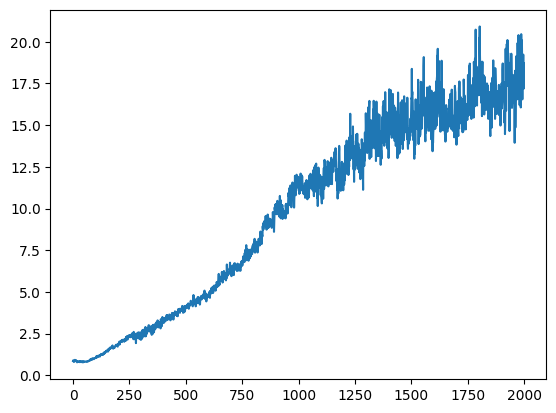

In [11]:
val_loss_buf = np.load("./results/SAbDab/full/seq1_neg0/pesi/val_loss_buf.npy")
val_acc_best = np.load("./results/SAbDab/full/seq1_neg0/pesi/val_acc_best.npy")
val_f1_best = np.load("./results/SAbDab/full/seq1_neg0/pesi/val_f1_best.npy")
val_auc_best = np.load("./results/SAbDab/full/seq1_neg0/pesi/val_auc_best.npy")
val_gmean_best = np.load("./results/SAbDab/full/seq1_neg0/pesi/val_gmean_best.npy")
val_mcc_best = np.load("./results/SAbDab/full/seq1_neg0/pesi/val_mcc_best.npy")

plt.plot(val_loss_buf), list(val_loss_buf).index(val_loss_buf.min()), val_loss_buf.min()

In [14]:
val_acc_best, val_f1_best, val_auc_best, val_gmean_best, val_mcc_best

(array(0.3655914),
 array(0.3269962),
 array(0.48564144),
 array(0.41258061),
 array(0.02968637))

# fine-tuning 10-fold

Cij in confusion matrix: pred=i, label=j

In [3]:
def test(model_path, test_loader, i, use_BSS=False):
    
    criterion = nn.BCELoss()
    
    with torch.no_grad():
        path = os.path.join("./results/CoV-AbDab", model_path, "model_{}_best.pth".format(i))
        print(path)
        model = torch.load(path)
        model.eval()

        preds = []
        labels = []
        val_loss_tmp = []
        for i, (para, epi, label) in enumerate(test_loader):
            if use_BSS==False:
                pred = model(para, epi)
            elif use_BSS==True:
                pred, BSS = model(para, epi)
            else:
                pass

            val_loss = criterion(pred.view(-1), label.view(-1).cuda())

            if use_BSS==True:
                val_loss += 0.001*BSS

            preds.append(pred.detach().cpu().view(-1))
            labels.append(label.view(-1))
            val_loss_tmp.append(val_loss.item())

        preds = torch.stack(preds, axis=1).view(-1)
        labels = torch.stack(labels, axis=1).view(-1)

        return preds, labels
        
#         acc, f1, auc, gmean, mcc = evaluate_metrics(pred_proba=preds, label=labels)

In [5]:
def eval_results(path="pesi_05-29-00-56-03", ntimes=3, threshold=0.5):
    results = []

    for i in range(ntimes):
        result_i = pickle.load(open("./results/CoV-AbDab/pesi_05-29-00-56-03/result_{}.pkl".format(i), "rb"))
        results.append(result_i)

    print("{} times".format(len(results)))
    
    acc = [np.mean(tmp[1]) for tmp in results]
    f1 = [np.mean(tmp[2]) for tmp in results]
    auc = [np.mean(tmp[3]) for tmp in results]
    gmean = [np.mean(tmp[4]) for tmp in results]
    mcc = [np.mean(tmp[5]) for tmp in results]
    
    print("acc: \t{:.4f} ± {:.4f}".format(np.mean(acc), np.std(acc)))
    print("f1: \t{:.4f} ± {:.4f}".format(np.mean(f1), np.std(f1)))
    print("auc: \t{:.4f} ± {:.4f}".format(np.mean(auc), np.std(auc)))
    print("gmean: \t{:.4f} ± {:.4f}".format(np.mean(gmean), np.std(gmean)))
    print("mcc: \t{:.4f} ± {:.4f}".format(np.mean(mcc), np.std(mcc)))
    
    # confusion matrices
#     acc_buf, f1_buf, auc_buf, gmean_buf, mcc_buf = [], [], [], [], []
    res = []
    for i in range(ntimes):
        print("Times {}".format(i))
        for k in range(10):
            test_dataset = SeqDataset(data_path="../SARS-SAbDab_Shaun/CoV-AbDab_extract.csv", 
                                      kfold=10, 
                                      holdout_fold=k, 
                                      is_train_test_full="test", 
                                      use_pair=False, 
                                      balance_samples=False, 
                                      use_part=False)
            use_aug = True
            collate_fn_test = my_collate_fn1 if use_aug==True else collate_fn
            test_loader = torch.utils.data.DataLoader(test_dataset, 
                                                      batch_size=1, 
                                                      shuffle=False, 
                                                      collate_fn=collate_fn_test)
            preds, labels = test(model_path=path, test_loader=test_loader, i=k)
            print(confusion_matrix(y_true=labels, y_pred=preds>=0.6))
#             print(confusion_matrix(y_true=labels, y_pred=torch.round(preds)))
            print(preds)
            print(labels)
            acc, f1, auc, gmean, mcc = evaluate_metrics(pred_proba=preds>=threshold, label=labels)
            print(acc, f1, auc, gmean, mcc)
            res.append([acc, f1, auc, gmean, mcc])

    acc = [np.mean(tmp[0]) for tmp in res]
    f1 = [np.mean(tmp[1]) for tmp in res]
    auc = [np.mean(tmp[2]) for tmp in res]
    gmean = [np.mean(tmp[3]) for tmp in res]
    mcc = [np.mean(tmp[4]) for tmp in res]

    print("\n\n")
    print("Threshold {}".format(threshold))
    print("acc: \t{:.4f} ± {:.4f}".format(np.mean(acc), np.std(acc)))
    print("f1: \t{:.4f} ± {:.4f}".format(np.mean(f1), np.std(f1)))
    print("auc: \t{:.4f} ± {:.4f}".format(np.mean(auc), np.std(auc)))
    print("gmean: \t{:.4f} ± {:.4f}".format(np.mean(gmean), np.std(gmean)))
    print("mcc: \t{:.4f} ± {:.4f}".format(np.mean(mcc), np.std(mcc)))
            
    return res

# LSTM 10fold

In [6]:
results = eval_results("lstm_07-14-22-21-42", ntimes=3, threshold=0.5)

3 times
acc: 	0.7370 ± 0.0000
f1: 	0.8475 ± 0.0000
auc: 	0.6530 ± 0.0126
gmean: 	0.0000 ± 0.0000
mcc: 	0.0000 ± 0.0000
Times 0


FileNotFoundError: [Errno 2] No such file or directory: '../SARS-SAbDab_Shaun/CoV-AbDab_extract.csv'

# PESI Small

In [4]:
results = eval_results("pesi_06-16-00-07-05", ntimes=3, threshold=0.5)

3 times
acc: 	0.7370 ± 0.0000
f1: 	0.8475 ± 0.0000
auc: 	0.6530 ± 0.0126
gmean: 	0.0000 ± 0.0000
mcc: 	0.0000 ± 0.0000
Times 0
./results/CoV-AbDab/pesi_06-16-00-07-05/model_0_best.pth
[[ 2  8]
 [ 9 12]]
tensor([0.6865, 0.7156, 0.6870, 0.6315, 0.6553, 0.4934, 0.5199, 0.4780, 0.6378,
        0.7259, 0.6681, 0.5949, 0.5975, 0.6259, 0.6519, 0.6028, 0.7069, 0.6191,
        0.5426, 0.6332, 0.4989, 0.6662, 0.6016, 0.5094, 0.4857, 0.4720, 0.5321,
        0.6268, 0.6081, 0.6811, 0.6236])
tensor([0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
0.5161290322580645 0.6808510638297872 0.38095238095238093 0.0 -0.30261376633440124
./results/CoV-AbDab/pesi_06-16-00-07-05/model_1_best.pth
[[ 4  7]
 [ 6 14]]
tensor([0.6432, 0.5956, 0.6704, 0.6597, 0.6212, 0.6506, 0.6800, 0.6282, 0.6592,
        0.6283, 0.6456, 0.6081, 0.4576, 0.5846, 0.6223, 0.4640, 0.6403, 0.4920,
        0.6333, 0.6307, 0.5921, 0.5956, 0.6041, 0.6705, 

[[ 1  7]
 [ 5 18]]
tensor([0.6240, 0.6941, 0.5968, 0.6754, 0.6912, 0.6189, 0.6868, 0.6938, 0.4666,
        0.6894, 0.6876, 0.6606, 0.6162, 0.6663, 0.6126, 0.6703, 0.4512, 0.6647,
        0.6599, 0.6951, 0.5120, 0.5857, 0.4396, 0.6708, 0.6880, 0.6308, 0.6697,
        0.6887, 0.6895, 0.6893, 0.6650])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.])
0.7096774193548387 0.8235294117647057 0.5190217391304348 0.33783196234608814 0.05630532705768135
./results/CoV-AbDab/pesi_06-16-00-07-05/model_6_best.pth
[[ 1  4]
 [ 5 21]]
tensor([0.6257, 0.4614, 0.5135, 0.7311, 0.6059, 0.4750, 0.7340, 0.7246, 0.7022,
        0.4672, 0.7121, 0.6052, 0.5155, 0.7112, 0.6659, 0.7112, 0.7033, 0.6889,
        0.6999, 0.6146, 0.4637, 0.6892, 0.6753, 0.7226, 0.6285, 0.6987, 0.7157,
        0.6790, 0.6700, 0.7197, 0.6275])
tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
        1., 0., 1., 1., 1

In [5]:
results = eval_results("pesi_06-16-00-07-05", ntimes=3, threshold=0.6)

3 times
acc: 	0.7370 ± 0.0000
f1: 	0.8475 ± 0.0000
auc: 	0.6530 ± 0.0126
gmean: 	0.0000 ± 0.0000
mcc: 	0.0000 ± 0.0000
Times 0
./results/CoV-AbDab/pesi_06-16-00-07-05/model_0_best.pth
[[ 2  8]
 [ 9 12]]
tensor([0.6865, 0.7156, 0.6870, 0.6315, 0.6553, 0.4934, 0.5199, 0.4780, 0.6378,
        0.7259, 0.6681, 0.5949, 0.5975, 0.6259, 0.6519, 0.6028, 0.7069, 0.6191,
        0.5426, 0.6332, 0.4989, 0.6662, 0.6016, 0.5094, 0.4857, 0.4720, 0.5321,
        0.6268, 0.6081, 0.6811, 0.6236])
tensor([0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
0.45161290322580644 0.5853658536585366 0.3857142857142857 0.3380617018914066 -0.22331621049563302
./results/CoV-AbDab/pesi_06-16-00-07-05/model_1_best.pth
[[ 4  7]
 [ 6 14]]
tensor([0.6432, 0.5956, 0.6704, 0.6597, 0.6212, 0.6506, 0.6800, 0.6282, 0.6592,
        0.6283, 0.6456, 0.6081, 0.4576, 0.5846, 0.6223, 0.4640, 0.6403, 0.4920,
        0.6333, 0.6307, 0.5921, 0.5956, 0

[[ 1  4]
 [ 5 21]]
tensor([0.6257, 0.4614, 0.5135, 0.7311, 0.6059, 0.4750, 0.7340, 0.7246, 0.7022,
        0.4672, 0.7121, 0.6052, 0.5155, 0.7112, 0.6659, 0.7112, 0.7033, 0.6889,
        0.6999, 0.6146, 0.4637, 0.6892, 0.6753, 0.7226, 0.6285, 0.6987, 0.7157,
        0.6790, 0.6700, 0.7197, 0.6275])
tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
0.7096774193548387 0.8235294117647058 0.5038461538461538 0.4019184762342502 0.007161148740394328
./results/CoV-AbDab/pesi_06-16-00-07-05/model_7_best.pth
[[ 7  2]
 [11 11]]
tensor([0.4738, 0.9511, 0.3910, 0.9270, 0.8575, 0.4426, 0.9486, 0.3757, 0.4145,
        0.4192, 0.8206, 0.5361, 0.4453, 0.9355, 0.2338, 0.9279, 0.4352, 0.5455,
        0.7366, 0.5031, 0.8465, 0.9298, 0.4560, 0.9374, 0.3999, 0.3862, 0.9419,
        0.5522, 0.5531, 0.3571, 0.9039])
tensor([1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
        0., 1., 0., 1., 1

## FSL - CosCLF

- pretrained with SetTrans.+LinearCLF
- validate on part-covabdab for model selection
- finetuned on rest of covabdab with SetTrans.+CosCLF

In [61]:
results = eval_results("pesi_05-29-15-50-44", ntimes=3, threshold=0.5)

3 times
acc: 	0.7370 ± 0.0000
f1: 	0.8475 ± 0.0000
auc: 	0.6530 ± 0.0126
gmean: 	0.0000 ± 0.0000
mcc: 	0.0000 ± 0.0000
Times 0
./results/CoV-AbDab/pesi_05-29-15-50-44/model_0_best.pth
[[ 6  4]
 [ 3 18]]
tensor([0.5028, 0.7089, 0.7064, 0.5199, 0.8614, 0.6368, 0.5723, 0.7769, 0.5191,
        0.6686, 0.5036, 0.7577, 0.5034, 0.8766, 0.7987, 0.7811, 0.5541, 0.9157,
        0.5484, 0.8140, 0.9203, 0.6406, 0.6295, 0.6594, 0.8931, 0.9146, 0.7622,
        0.7467, 0.5082, 0.8983, 0.9108])
tensor([0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
0.6774193548387096 0.8076923076923077 0.5 0.0 0.0
./results/CoV-AbDab/pesi_05-29-15-50-44/model_1_best.pth
[[ 3  8]
 [ 1 19]]
tensor([0.5222, 0.8549, 0.6414, 0.8159, 0.8676, 0.8446, 0.7505, 0.6098, 0.6215,
        0.6720, 0.7693, 0.8673, 0.8674, 0.5022, 0.7937, 0.8618, 0.8458, 0.5424,
        0.8507, 0.5118, 0.6655, 0.8363, 0.8308, 0.8615, 0.8706, 0.8279, 0.7817,
        0

[[ 5  4]
 [ 9 13]]
tensor([0.6625, 0.5582, 0.6837, 0.5076, 0.6301, 0.5410, 0.5788, 0.5489, 0.6664,
        0.6805, 0.6075, 0.5815, 0.5270, 0.5506, 0.6751, 0.5789, 0.6120, 0.5530,
        0.6710, 0.6878, 0.5312, 0.6543, 0.6597, 0.6426, 0.6864, 0.6049, 0.5526,
        0.5772, 0.6622, 0.6218, 0.5209])
tensor([1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
        0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.])
0.7096774193548387 0.8301886792452831 0.5 0.0 0.0
./results/CoV-AbDab/pesi_05-29-15-50-44/model_8_best.pth
[[ 6  5]
 [ 9 11]]
tensor([0.5825, 0.5862, 0.5383, 0.5920, 0.5904, 0.5684, 0.5760, 0.6582, 0.6747,
        0.5539, 0.6817, 0.6535, 0.6836, 0.5374, 0.7212, 0.7393, 0.6205, 0.5049,
        0.6098, 0.7023, 0.6060, 0.6721, 0.5909, 0.6643, 0.6480, 0.5574, 0.6053,
        0.6133, 0.5902, 0.5028, 0.5046])
tensor([0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
        0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.])
0.645161290

In [59]:
results = eval_results("pesi_05-29-15-50-44", ntimes=3, threshold=0.6)

3 times
acc: 	0.7370 ± 0.0000
f1: 	0.8475 ± 0.0000
auc: 	0.6530 ± 0.0126
gmean: 	0.0000 ± 0.0000
mcc: 	0.0000 ± 0.0000
Times 0
./results/CoV-AbDab/pesi_05-29-15-50-44/model_0_best.pth
[[ 6  4]
 [ 3 18]]
tensor([0.5028, 0.7089, 0.7064, 0.5199, 0.8614, 0.6368, 0.5723, 0.7769, 0.5191,
        0.6686, 0.5036, 0.7577, 0.5034, 0.8766, 0.7987, 0.7811, 0.5541, 0.9157,
        0.5484, 0.8140, 0.9203, 0.6406, 0.6295, 0.6594, 0.8931, 0.9146, 0.7622,
        0.7467, 0.5082, 0.8983, 0.9108])
tensor([0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
0.7741935483870968 0.8372093023255814 0.7285714285714286 0.7171371656006361 0.47079190906919977
./results/CoV-AbDab/pesi_05-29-15-50-44/model_1_best.pth
[[ 3  8]
 [ 1 19]]
tensor([0.5222, 0.8549, 0.6414, 0.8159, 0.8676, 0.8446, 0.7505, 0.6098, 0.6215,
        0.6720, 0.7693, 0.8673, 0.8674, 0.5022, 0.7937, 0.8618, 0.8458, 0.5424,
        0.8507, 0.5118, 0.6655, 0.8363, 0.8

[[ 0  1]
 [ 7 23]]
tensor([0.9331, 0.9577, 0.9617, 0.5527, 0.9394, 0.5722, 0.8721, 0.6132, 0.6449,
        0.5298, 0.9345, 0.9334, 0.9694, 0.8525, 0.5276, 0.9703, 0.8962, 0.9489,
        0.5258, 0.9457, 0.8725, 0.5104, 0.9617, 0.6284, 0.9665, 0.9214, 0.9692,
        0.9665, 0.5202, 0.9685, 0.9464])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.])
0.7419354838709677 0.8518518518518519 0.38333333333333336 0.0 -0.09860132971832693
./results/CoV-AbDab/pesi_05-29-15-50-44/model_5_best.pth
[[ 4  4]
 [ 3 20]]
tensor([0.7188, 0.7112, 0.7063, 0.8174, 0.6833, 0.8451, 0.6735, 0.9497, 0.7118,
        0.5106, 0.9334, 0.5800, 0.5689, 0.8706, 0.5047, 0.8613, 0.6934, 0.8124,
        0.7647, 0.5096, 0.8775, 0.6475, 0.7049, 0.7074, 0.9354, 0.6127, 0.6634,
        0.5820, 0.9458, 0.9374, 0.5646])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 1., 1., 0., 0., 1., 1.,

[[ 4  3]
 [ 4 20]]
tensor([0.7488, 0.5386, 0.5835, 0.7093, 0.8107, 0.7062, 0.8278, 0.8250, 0.5260,
        0.8360, 0.8425, 0.5729, 0.7692, 0.5677, 0.7888, 0.8347, 0.6855, 0.8061,
        0.6449, 0.6556, 0.6491, 0.7148, 0.7938, 0.6778, 0.5002, 0.5406, 0.8337,
        0.6878, 0.7328, 0.5576, 0.8117])
tensor([1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.])
0.7741935483870968 0.851063829787234 0.7023809523809524 0.6900655593423543 0.38676339191429654



Threshold 0.6
acc: 	0.7032 ± 0.0997
f1: 	0.7677 ± 0.1301
auc: 	0.6114 ± 0.1158
gmean: 	0.5422 ± 0.2104
mcc: 	0.2487 ± 0.2101


In [60]:
results = eval_results("pesi_05-29-15-50-44", ntimes=3, threshold=0.7)

3 times
acc: 	0.7370 ± 0.0000
f1: 	0.8475 ± 0.0000
auc: 	0.6530 ± 0.0126
gmean: 	0.0000 ± 0.0000
mcc: 	0.0000 ± 0.0000
Times 0
./results/CoV-AbDab/pesi_05-29-15-50-44/model_0_best.pth
[[ 6  4]
 [ 3 18]]
tensor([0.5028, 0.7089, 0.7064, 0.5199, 0.8614, 0.6368, 0.5723, 0.7769, 0.5191,
        0.6686, 0.5036, 0.7577, 0.5034, 0.8766, 0.7987, 0.7811, 0.5541, 0.9157,
        0.5484, 0.8140, 0.9203, 0.6406, 0.6295, 0.6594, 0.8931, 0.9146, 0.7622,
        0.7467, 0.5082, 0.8983, 0.9108])
tensor([0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
0.6774193548387096 0.7368421052631577 0.6833333333333332 0.6831300510639732 0.3444233600968322
./results/CoV-AbDab/pesi_05-29-15-50-44/model_1_best.pth
[[ 3  8]
 [ 1 19]]
tensor([0.5222, 0.8549, 0.6414, 0.8159, 0.8676, 0.8446, 0.7505, 0.6098, 0.6215,
        0.6720, 0.7693, 0.8673, 0.8674, 0.5022, 0.7937, 0.8618, 0.8458, 0.5424,
        0.8507, 0.5118, 0.6655, 0.8363, 0.83

[[ 0  1]
 [ 7 23]]
tensor([0.9331, 0.9577, 0.9617, 0.5527, 0.9394, 0.5722, 0.8721, 0.6132, 0.6449,
        0.5298, 0.9345, 0.9334, 0.9694, 0.8525, 0.5276, 0.9703, 0.8962, 0.9489,
        0.5258, 0.9457, 0.8725, 0.5104, 0.9617, 0.6284, 0.9665, 0.9214, 0.9692,
        0.9665, 0.5202, 0.9685, 0.9464])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.])
0.6451612903225806 0.7843137254901961 0.3333333333333333 0.0 -0.12598815766974242
./results/CoV-AbDab/pesi_05-29-15-50-44/model_5_best.pth
[[ 4  4]
 [ 3 20]]
tensor([0.7188, 0.7112, 0.7063, 0.8174, 0.6833, 0.8451, 0.6735, 0.9497, 0.7118,
        0.5106, 0.9334, 0.5800, 0.5689, 0.8706, 0.5047, 0.8613, 0.6934, 0.8124,
        0.7647, 0.5096, 0.8775, 0.6475, 0.7049, 0.7074, 0.9354, 0.6127, 0.6634,
        0.5820, 0.9458, 0.9374, 0.5646])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 1., 1., 0., 0., 1., 1., 

[[ 4  3]
 [ 4 20]]
tensor([0.7488, 0.5386, 0.5835, 0.7093, 0.8107, 0.7062, 0.8278, 0.8250, 0.5260,
        0.8360, 0.8425, 0.5729, 0.7692, 0.5677, 0.7888, 0.8347, 0.6855, 0.8061,
        0.6449, 0.6556, 0.6491, 0.7148, 0.7938, 0.6778, 0.5002, 0.5406, 0.8337,
        0.6878, 0.7328, 0.5576, 0.8117])
tensor([1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.])
0.6451612903225806 0.7317073170731708 0.6696428571428572 0.6681531047810609 0.28505701710570197



Threshold 0.7
acc: 	0.5516 ± 0.1253
f1: 	0.5357 ± 0.2940
auc: 	0.5568 ± 0.0989
gmean: 	0.4241 ± 0.2545
mcc: 	0.1167 ± 0.1452


In [ ]:
results = eval_results("pipr_", ntimes=3, threshold=0.6)